In [44]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore') 
#plt.style.use('dark_background') 

In [45]:
dataset = pd.read_csv('Data/credit_train.csv') 
dataset = dataset.dropna(how='all') 

In [46]:
dataset = dataset.iloc[: , 2:]
dataset.insert(0,'ID',dataset.index + 1)
dataset.head() 

,ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,1,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,2,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,3,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,4,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,5,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


In [47]:
dataset['Loan Status'].unique()  

array(['Fully Paid', 'Charged Off'], dtype=object)

In [48]:
dataset.info()  

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   ID                            100000 non-null  int64  
 1   Loan Status                   100000 non-null  object 
 2   Current Loan Amount           100000 non-null  float64
 3   Term                          100000 non-null  object 
 4   Credit Score                  80846 non-null   float64
 5   Annual Income                 80846 non-null   float64
 6   Years in current job          95778 non-null   object 
 7   Home Ownership                100000 non-null  object 
 8   Purpose                       100000 non-null  object 
 9   Monthly Debt                  100000 non-null  float64
 10  Years of Credit History       100000 non-null  float64
 11  Months since last delinquent  46859 non-null   float64
 12  Number of Open Accounts       100000 non-null

In [49]:
missing_values = dataset.isnull().sum()
print(missing_values)

ID                                  0
Loan Status                         0
Current Loan Amount                 0
Term                                0
Credit Score                    19154
Annual Income                   19154
Years in current job             4222
Home Ownership                      0
Purpose                             0
Monthly Debt                        0
Years of Credit History             0
Months since last delinquent    53141
Number of Open Accounts             0
Number of Credit Problems           0
Current Credit Balance              0
Maximum Open Credit                 2
Bankruptcies                      204
Tax Liens                          10
dtype: int64


### Missing data treatment

In [50]:
from sklearn.impute import KNNImputer 
from sklearn.impute import SimpleImputer
array_data = dataset.values
array_data

array([[1, 'Fully Paid', 445412.0, ..., 416746.0, 1.0, 0.0],
       [2, 'Fully Paid', 262328.0, ..., 850784.0, 0.0, 0.0],
       [3, 'Fully Paid', 99999999.0, ..., 750090.0, 0.0, 0.0],
       ...,
       [99998, 'Fully Paid', 103136.0, ..., 537548.0, 1.0, 0.0],
       [99999, 'Fully Paid', 530332.0, ..., 738254.0, 0.0, 0.0],
       [100000, 'Fully Paid', 99999999.0, ..., 91014.0, 1.0, 0.0]],
      dtype=object)

In [51]:
# Imputation for the no numerical columns using SimpleImputer
imputer = SimpleImputer(missing_values=np.nan,strategy='most_frequent')
array_data[:,[6]] = imputer.fit_transform(array_data[:,[6]]) 

In [52]:
# Imputation for the numerical columns using mean
imputer = SimpleImputer(missing_values=np.nan,strategy='mean') 
array_data[:,[4,5,15,16,17]] = imputer.fit_transform(array_data[:,[4,5,15,16,17]]) 

In [53]:
new_data = pd.DataFrame(array_data,columns=list(dataset.columns))
dataset = new_data.drop(new_data.columns[11],axis=1)
missing_values = dataset.isnull().sum()
print(missing_values)

ID                           0
Loan Status                  0
Current Loan Amount          0
Term                         0
Credit Score                 0
Annual Income                0
Years in current job         0
Home Ownership               0
Purpose                      0
Monthly Debt                 0
Years of Credit History      0
Number of Open Accounts      0
Number of Credit Problems    0
Current Credit Balance       0
Maximum Open Credit          0
Bankruptcies                 0
Tax Liens                    0
dtype: int64


### Encoding values

In [54]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import KBinsDiscretizer  
from sklearn.preprocessing import MinMaxScaler

In [55]:
dataset['Years in current job'].unique()  

array(['8 years', '10+ years', '3 years', '5 years', '< 1 year',
       '2 years', '4 years', '9 years', '7 years', '1 year', '6 years'],
      dtype=object)

In [56]:
dataset['Years in current job'] = dataset['Years in current job'].replace({"< 1 year": "0 years", "10+ years": "10 years"}) 
dataset['Years in current job'].unique() 

array(['8 years', '10 years', '3 years', '5 years', '0 years', '2 years',
       '4 years', '9 years', '7 years', '1 year', '6 years'], dtype=object)

In [57]:
dataset['Years in current job'] = dataset['Years in current job'].astype('str')
dataset['Years in current job'] = dataset['Years in current job'].str.extract(r'(\d+)').astype('int')

In [58]:
dataset['Years in current job'].unique() 

array([ 8, 10,  3,  5,  0,  2,  4,  9,  7,  1,  6])

In [59]:
dataset.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 17 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   ID                         100000 non-null  object
 1   Loan Status                100000 non-null  object
 2   Current Loan Amount        100000 non-null  object
 3   Term                       100000 non-null  object
 4   Credit Score               100000 non-null  object
 5   Annual Income              100000 non-null  object
 6   Years in current job       100000 non-null  int32 
 7   Home Ownership             100000 non-null  object
 8   Purpose                    100000 non-null  object
 9   Monthly Debt               100000 non-null  object
 10  Years of Credit History    100000 non-null  object
 11  Number of Open Accounts    100000 non-null  object
 12  Number of Credit Problems  100000 non-null  object
 13  Current Credit Balance     100000 non-null  o

In [60]:
for column in dataset.columns.to_list()[1:] : 
    try : 
        dataset[column] = dataset[column].astype('float') 
    except : 
        pass

In [61]:
dataset.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 17 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         100000 non-null  object 
 1   Loan Status                100000 non-null  object 
 2   Current Loan Amount        100000 non-null  float64
 3   Term                       100000 non-null  object 
 4   Credit Score               100000 non-null  float64
 5   Annual Income              100000 non-null  float64
 6   Years in current job       100000 non-null  float64
 7   Home Ownership             100000 non-null  object 
 8   Purpose                    100000 non-null  object 
 9   Monthly Debt               100000 non-null  float64
 10  Years of Credit History    100000 non-null  float64
 11  Number of Open Accounts    100000 non-null  float64
 12  Number of Credit Problems  100000 non-null  float64
 13  Current Credit Balance     100

In [62]:
dataset.head() 

,ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,1,Fully Paid,445412.0,Short Term,709.000000,1.167493e+06,8.0,Home Mortgage,Home Improvements,5214.74,17.2,6.0,1.0,228190.0,416746.0,1.0,0.0
1,2,Fully Paid,262328.0,Short Term,1076.456089,1.378277e+06,10.0,Home Mortgage,Debt Consolidation,33295.98,21.1,35.0,0.0,229976.0,850784.0,0.0,0.0
2,3,Fully Paid,99999999.0,Short Term,741.000000,2.231892e+06,8.0,Own Home,Debt Consolidation,29200.53,14.9,18.0,1.0,297996.0,750090.0,0.0,0.0
3,4,Fully Paid,347666.0,Long Term,721.000000,8.069490e+05,3.0,Own Home,Debt Consolidation,8741.90,12.0,9.0,0.0,256329.0,386958.0,0.0,0.0
4,5,Fully Paid,176220.0,Short Term,1076.456089,1.378277e+06,5.0,Rent,Debt Consolidation,20639.70,6.1,15.0,0.0,253460.0,427174.0,0.0,0.0


In [63]:
minMAxScaler = MinMaxScaler() 
label_encoder = LabelEncoder()
for column in dataset.columns.to_list()[1:] : 
    try : 
        dataset[column] = minMAxScaler.fit_transform(dataset[column].values.reshape(-1,1))
    except : 
        try : 
            dataset[column] = label_encoder.fit_transform(dataset[column].values.reshape(-1,1))
        except : 
            pass

In [64]:
dataset.head() 

,ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,1,1,0.004347,1,0.017906,0.006592,0.8,1,5,0.011965,0.203288,0.078947,0.066667,0.006940,0.000271,0.142857,0.0
1,2,1,0.002516,1,0.070968,0.007866,1.0,1,3,0.076394,0.261584,0.460526,0.000000,0.006995,0.000553,0.000000,0.0
2,3,1,1.000000,1,0.022527,0.013024,0.8,2,3,0.066998,0.168909,0.236842,0.066667,0.009063,0.000487,0.000000,0.0
3,4,1,0.003369,0,0.019639,0.004413,0.3,2,3,0.020057,0.125561,0.118421,0.000000,0.007796,0.000251,0.000000,0.0
4,5,1,0.001654,1,0.070968,0.007866,0.5,3,3,0.047356,0.037369,0.197368,0.000000,0.007709,0.000277,0.000000,0.0


In [65]:
dataset['Tax Liens'].unique() 

array([0.        , 0.06666667, 0.13333333, 0.26666667, 0.2       ,
       0.4       , 0.33333333, 0.0019542 , 0.73333333, 1.        ,
       0.6       , 0.46666667, 0.66666667])

In [66]:
dataset['Loan Status'].unique()  

array([1, 0])

### Feature selection

In [67]:
X = dataset.drop(['ID','Loan Status'],axis=1)
y = dataset['Loan Status'] 

In [68]:
from sklearn.feature_selection import SelectKBest  
from sklearn.feature_selection import mutual_info_classif

X = dataset.drop(['ID','Loan Status'],axis=1)
y = dataset['Loan Status']  
feature_names = X.columns.to_list()
k = 9
f_selector = SelectKBest(mutual_info_classif,k=k) 
f_selector.fit_transform(X, y)
scores = f_selector.scores_
#print(X_new) 
selected_feature_indices = f_selector.get_support(indices=True)

selected_col_list = []
for i in selected_feature_indices:
    selected_col_list.append(feature_names[i])
     #print(feature_names[i]) 
print(selected_col_list) 
X_chosen = X[selected_col_list] 

['Current Loan Amount', 'Term', 'Credit Score', 'Annual Income', 'Home Ownership', 'Purpose', 'Monthly Debt', 'Current Credit Balance', 'Maximum Open Credit']


<AxesSubplot: xlabel='score', ylabel='feature'>

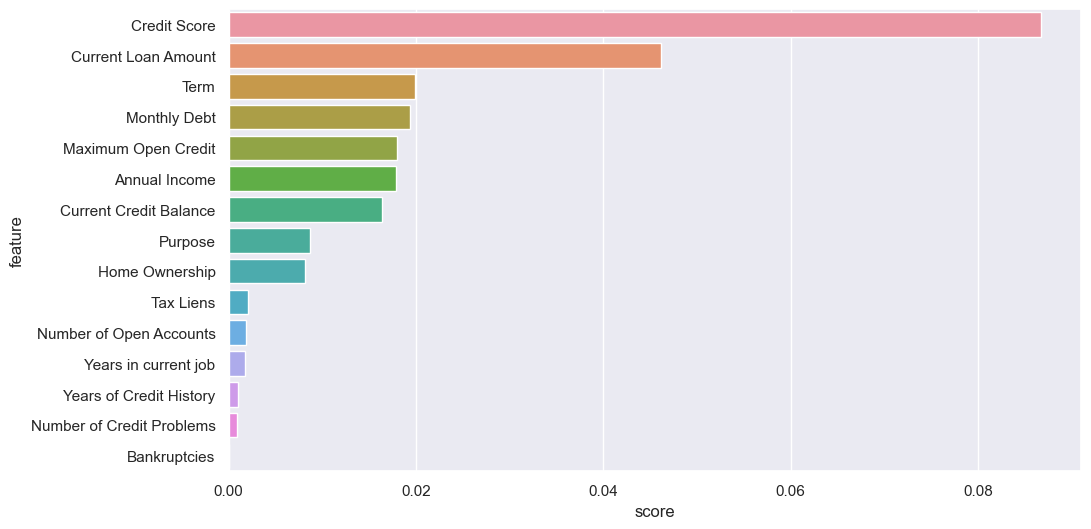

In [69]:
# Create a dataframe from the scores
plt.figure(figsize=(11,6)) 
scores_df = pd.DataFrame({'feature': X.columns, 'score': scores})
scores_df = scores_df.sort_values(by='score', ascending=False)
sns.barplot(data=scores_df,x='score',y='feature') 

In [70]:
X_chosen.head() 

,Current Loan Amount,Term,Credit Score,Annual Income,Home Ownership,Purpose,Monthly Debt,Current Credit Balance,Maximum Open Credit
0,0.004347,1,0.017906,0.006592,1,5,0.011965,0.006940,0.000271
1,0.002516,1,0.070968,0.007866,1,3,0.076394,0.006995,0.000553
2,1.000000,1,0.022527,0.013024,2,3,0.066998,0.009063,0.000487
3,0.003369,0,0.019639,0.004413,2,3,0.020057,0.007796,0.000251
4,0.001654,1,0.070968,0.007866,3,3,0.047356,0.007709,0.000277


### Modeling 

In [71]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.svm import SVC 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.ensemble import AdaBoostClassifier 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn.model_selection import train_test_split,cross_val_score  

<AxesSubplot: xlabel='Loan Status', ylabel='count'>

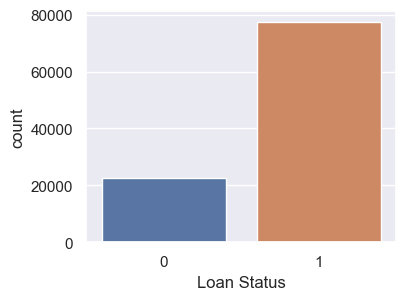

In [72]:
plt.figure(figsize=(4,3)) 
sns.countplot(data=dataset,x='Loan Status')  

In [73]:
from sklearn.metrics import accuracy_score 

In [74]:
models_score = pd.DataFrame(columns=['Model','Accuracy Score'])
models_score 

,Model,Accuracy Score


#### Random Forest 

In [75]:
random_forest = RandomForestClassifier(n_estimators=9) 
X_train , X_test , y_train , y_test = train_test_split(X_chosen,y)
random_forest.fit(X_train,y_train) 
y_pred_rf = random_forest.predict(X_test)
models_score = models_score.append({'Model':'Random Forest','Accuracy Score':accuracy_score(y_test,y_pred_rf) },ignore_index = True)
accuracy_score(y_test,y_pred_rf) 

0.8024

#### KNN

In [76]:
knn = KNeighborsClassifier(n_neighbors=7) 
knn.fit(X_train,y_train) 
y_pred_knn = knn.predict(X_test)
models_score = models_score.append({'Model':'KNN','Accuracy Score':accuracy_score(y_test,y_pred_knn)},ignore_index = True)
accuracy_score(y_test,y_pred_knn) 

0.80156

#### Decision Tree

In [77]:
decision_tree = DecisionTreeClassifier(max_depth=10)
decision_tree.fit(X_train,y_train) 
y_pred_dt = decision_tree.predict(X_test) 
models_score = models_score.append({'Model':'Decision Tree','Accuracy Score':accuracy_score(y_test,y_pred_dt)},ignore_index = True)
accuracy_score(y_test,y_pred_dt)  

0.81504

#### Logistic Regression

In [78]:
logitic_regression = LogisticRegression(random_state=0) 
logitic_regression.fit(X_train,y_train) 
y_pred_log = logitic_regression.predict(X_test)
models_score = models_score.append({'Model':'Logistic Regression','Accuracy Score':accuracy_score(y_test,y_pred_log)},ignore_index = True)
accuracy_score(y_test,y_pred_log) 

0.81876

#### Gaussian Naive Bayes 

In [79]:
naive_bayes = GaussianNB() 
naive_bayes.fit(X_train,y_train) 
y_pred_nb = naive_bayes.predict(X_test)
models_score = models_score.append({'Model':'Gaussian Naive Bayes','Accuracy Score':accuracy_score(y_test,y_pred_nb)},ignore_index = True)
accuracy_score(y_test,y_pred_nb)   

0.37

#### Gradient Boosting

In [80]:
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0) 
gb.fit(X_train,y_train)
y_pred_gb = gb.predict(X_test) 
models_score = models_score.append({'Model':'Gradient Boosting','Accuracy Score':accuracy_score(y_test,y_pred_gb)},ignore_index = True)
accuracy_score(y_test,y_pred_gb)   

0.81884

#### Adaptive boosting

In [81]:
ada = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=200, algorithm="SAMME.R", learning_rate=0.5) 
ada.fit(X_train,y_train)
y_pred_ada = ada.predict(X_test)
models_score = models_score.append({'Model':'Adaptive Boosting','Accuracy Score':accuracy_score(y_test,y_pred_ada)},ignore_index = True)
accuracy_score(y_test,y_pred_ada)   

0.81888

#### Linear Discriminant Analysis (LDA) 


In [82]:
lda = LinearDiscriminantAnalysis() 
lda.fit(X_train,y_train)
y_pred_lda = lda.predict(X_test)
models_score = models_score.append({'Model':'Linear Discriminant Analysis','Accuracy Score':accuracy_score(y_test,y_pred_lda)},ignore_index = True)
accuracy_score(y_test,y_pred_lda)  

0.81868

### Evaluation

#### Evaluation based on the Accuracy Score

In [83]:
models_score = models_score.sort_values(by='Accuracy Score', ascending=False) 
models_score 

,Model,Accuracy Score
6,Adaptive Boosting,0.81888
5,Gradient Boosting,0.81884
3,Logistic Regression,0.81876
7,Linear Discriminant Analysis,0.81868
2,Decision Tree,0.81504
0,Random Forest,0.80240
1,KNN,0.80156
4,Gaussian Naive Bayes,0.37000


#### Roc curve

Text(0, 0.5, 'True Positive Rate')

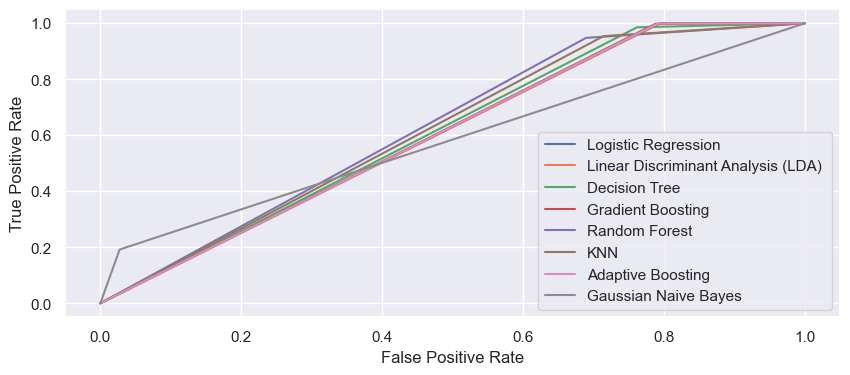

In [84]:
from sklearn.metrics import roc_curve , roc_auc_score
rf_fpr, rf_tpr, _ = roc_curve(y_test,y_pred_rf) 
knn_fpr , knn_tpr, _ = roc_curve(y_test,y_pred_knn) 
dt_fpr , dt_tpr, _ = roc_curve(y_test,y_pred_dt)
log_fpr , log_tpr, _ = roc_curve(y_test,y_pred_log)
nb_fpr , nb_tpr, _ = roc_curve(y_test,y_pred_nb) 
gb_fpr , gb_tpr, _ = roc_curve(y_test,y_pred_gb)
ada_fpr , ada_tpr, _ = roc_curve(y_test,y_pred_ada)
lda_fpr , lda_tpr, _ = roc_curve(y_test,y_pred_lda)
plt.figure(figsize=(10,4)) 
sns.set(style="darkgrid") 
sns.lineplot(x=log_fpr, y=log_tpr, label='Logistic Regression')
sns.lineplot(x=lda_fpr, y=lda_tpr, label='Linear Discriminant Analysis (LDA) ')
sns.lineplot(x=dt_fpr, y=dt_tpr, label='Decision Tree') 
sns.lineplot(x=gb_fpr, y=gb_tpr, label='Gradient Boosting')
sns.lineplot(x=rf_fpr, y=rf_tpr, label='Random Forest')
sns.lineplot(x=knn_fpr, y=knn_tpr, label='KNN')
sns.lineplot(x=ada_fpr, y=ada_tpr, label='Adaptive Boosting')
sns.lineplot(x=nb_fpr, y=nb_tpr, label='Gaussian Naive Bayes')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

#### Learning curve for Adaptive Boosting

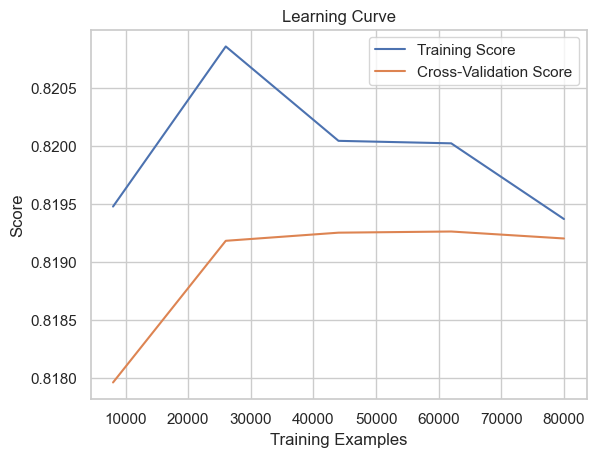

In [ ]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(ada, X_chosen, y, cv=5)
# Plot the learning curve
sns.set(style="whitegrid")
plt.figure()
plt.plot(train_sizes, train_scores.mean(axis=1), label='Training Score')
plt.plot(train_sizes, test_scores.mean(axis=1), label='Cross-Validation Score')
plt.title('Learning Curve')
plt.xlabel('Training Examples')
plt.ylabel('Score')
plt.legend()
plt.show()

#### Learning curve for Decision Tree

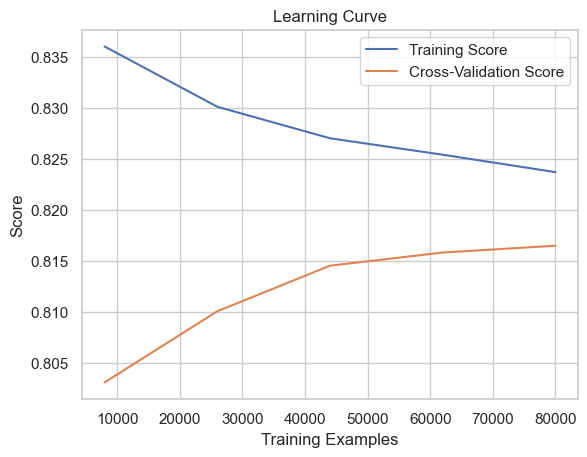

In [ ]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(decision_tree, X_chosen, y, cv=5)
# Plot the learning curve
sns.set(style="whitegrid")
plt.figure()
plt.plot(train_sizes, train_scores.mean(axis=1), label='Training Score')
plt.plot(train_sizes, test_scores.mean(axis=1), label='Cross-Validation Score')
plt.title('Learning Curve')
plt.xlabel('Training Examples')
plt.ylabel('Score')
plt.legend()
plt.show()

#### Distribution of errors (Gradient Boosting)

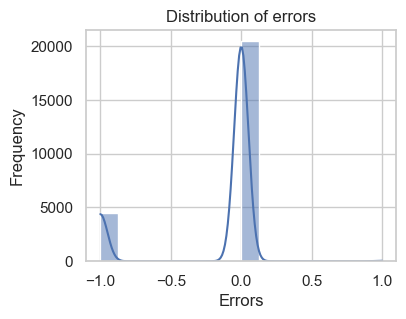

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

errors = y_test - y_pred_gb
# create a histogram of the errors
plt.figure(figsize=(4,3))
sns.histplot(errors, kde=True)
plt.xlabel('Errors')
plt.ylabel('Frequency')
plt.title('Distribution of errors')
plt.show()

#### Distribution of errors (Naive Bayes)  

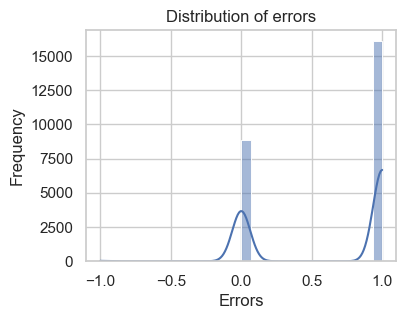

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

errors = y_test - y_pred_nb 
# create a histogram of the errors
plt.figure(figsize=(4,3))
sns.histplot(errors, kde=True)
plt.xlabel('Errors')
plt.ylabel('Frequency')
plt.title('Distribution of errors')
plt.show()

#### Perumatation importance with Gradient Boosting

In [ ]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(gb, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.0713 ± 0.0008,Credit Score
0.0032 ± 0.0005,Annual Income
0.0009 ± 0.0007,Maximum Open Credit
0.0008 ± 0.0003,Current Loan Amount
0.0005 ± 0.0006,Purpose
0.0004 ± 0.0005,Home Ownership
0.0003 ± 0.0007,Current Credit Balance
0.0002 ± 0.0004,Monthly Debt
0.0002 ± 0.0001,Term


#### Permuation importance with Linear Discriminant Analysis (LDA) 

In [ ]:
perm = PermutationImportance(lda, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.0708 ± 0.0012,Credit Score
0.0000 ± 0.0000,Monthly Debt
0 ± 0.0000,Maximum Open Credit
0 ± 0.0000,Current Credit Balance
0 ± 0.0000,Purpose
0 ± 0.0000,Home Ownership
0 ± 0.0000,Term
0 ± 0.0000,Current Loan Amount
-0.0000 ± 0.0000,Annual Income


#### Permuation importance with Decision Tree

In [ ]:
perm = PermutationImportance(decision_tree, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.0744 ± 0.0019,Credit Score
0.0061 ± 0.0022,Term
0.0030 ± 0.0014,Maximum Open Credit
0.0026 ± 0.0008,Current Loan Amount
0.0020 ± 0.0005,Home Ownership
0.0016 ± 0.0011,Current Credit Balance
0.0010 ± 0.0008,Annual Income
0.0003 ± 0.0003,Purpose
-0.0000 ± 0.0010,Monthly Debt


#### Permuation importance with Random Forest

In [ ]:
perm = PermutationImportance(random_forest, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist()) 

Weight,Feature
0.0735 ± 0.0022,Credit Score
0.0209 ± 0.0029,Current Loan Amount
0.0177 ± 0.0024,Current Credit Balance
0.0174 ± 0.0044,Annual Income
0.0161 ± 0.0024,Maximum Open Credit
0.0143 ± 0.0016,Monthly Debt
0.0107 ± 0.0018,Term
0.0041 ± 0.0022,Home Ownership
0.0026 ± 0.0010,Purpose
